In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [3]:
print (x,y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]] [0 0 0 0 1 1 1 1 1 1]


In [4]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [5]:
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

In [6]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)

In [7]:
model.classes_

array([0, 1])

In [8]:
print(model.intercept_, model.coef_)

[-1.04608067] [[0.51491375]]


In [9]:
model.predict_proba(x)

#angka yg paling dekat itu yg diambil

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [10]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [11]:
model.score(x,y)

0.9

In [12]:
confusion_matrix(y, model.predict(x))

array([[3, 1],
       [0, 6]], dtype=int64)

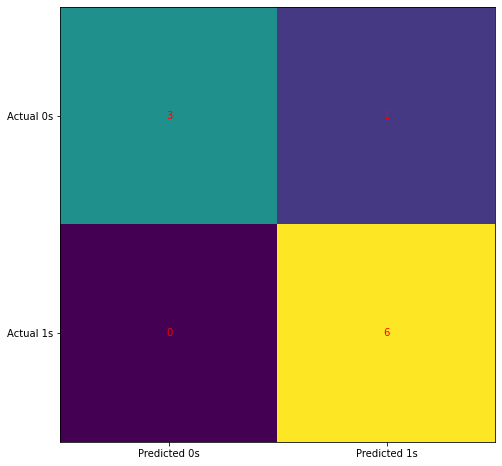

In [13]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [14]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [15]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [16]:
print(model.intercept_, model.coef_)

[-3.51335372] [[1.12066084]]


In [17]:
print(model.predict_proba(x))

[[0.97106534 0.02893466]
 [0.9162684  0.0837316 ]
 [0.7810904  0.2189096 ]
 [0.53777071 0.46222929]
 [0.27502212 0.72497788]
 [0.11007743 0.88992257]
 [0.03876835 0.96123165]
 [0.01298011 0.98701989]
 [0.0042697  0.9957303 ]
 [0.00139621 0.99860379]]


In [18]:
print(model.predict(x))

[0 0 0 0 1 1 1 1 1 1]


In [19]:
model.score(x,y)

1.0

In [20]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
x, y = load_digits(return_X_y=True)

In [22]:
print(x)
print(y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [27]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [28]:
print(x_train)

[[ 0.         -0.33790435 -1.09141592 ...  1.58325794  3.53125595
   3.30213343]
 [ 0.          2.90642897  1.41696421 ...  1.58325794  0.00595786
  -0.18695903]
 [ 0.          0.74354009  0.99890086 ... -1.14493411 -0.49765616
  -0.18695903]
 ...
 [ 0.         -0.33790435 -0.04625753 ... -1.14493411 -0.49765616
  -0.18695903]
 [ 0.         -0.33790435 -0.25528921 ... -1.14493411 -0.49765616
  -0.18695903]
 [ 0.         -0.33790435  0.16277415 ...  0.73069792 -0.49765616
  -0.18695903]]


In [30]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [32]:
LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [33]:
x_test = scaler.transform(x_test)

In [34]:
y_pred = model.predict(x_test)

In [35]:
model.score(x_train, y_train)

0.964509394572025

In [36]:
model.score(x_test, y_test)

0.8805555555555555

In [37]:
confusion_matrix(y_test, y_pred)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 1,  3, 28,  0,  0,  0,  0,  0,  4,  0],
       [ 0,  0,  0, 26,  0,  0,  0,  0,  3,  0],
       [ 0,  3,  0,  0, 23,  0,  0,  1,  3,  0],
       [ 0,  1,  0,  0,  0, 38,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  0, 40,  0,  3,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 34,  4,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 38,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 10, 30]], dtype=int64)

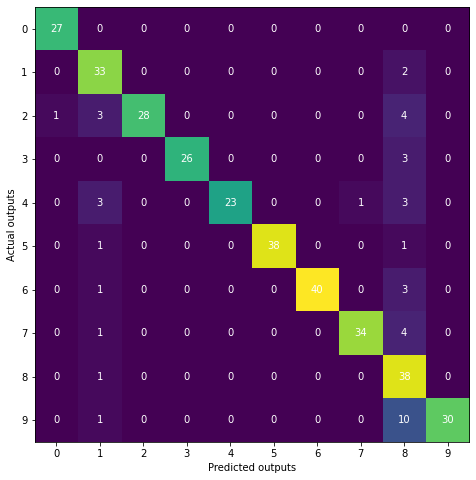

In [38]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.75      0.94      0.84        35
           2       1.00      0.78      0.88        36
           3       1.00      0.90      0.95        29
           4       1.00      0.77      0.87        30
           5       1.00      0.95      0.97        40
           6       1.00      0.91      0.95        44
           7       0.97      0.87      0.92        39
           8       0.56      0.97      0.71        39
           9       1.00      0.73      0.85        41

    accuracy                           0.88       360
   macro avg       0.92      0.88      0.89       360
weighted avg       0.92      0.88      0.89       360

